# 74. Search a 2D Matrix

### Difficulty: <font color = orange> Medium </font>

---

You are given an `m x n` integer matrix `matrix` with the following two properties:

- Each row is sorted in non-decreasing order.

- The first integer of each row is greater than the last integer of the previous row.

Given an integer `target`, return `true` if `target` is in `matrix` or `false` otherwise.

You must write a solution in `O(log(m * n))` time complexity.

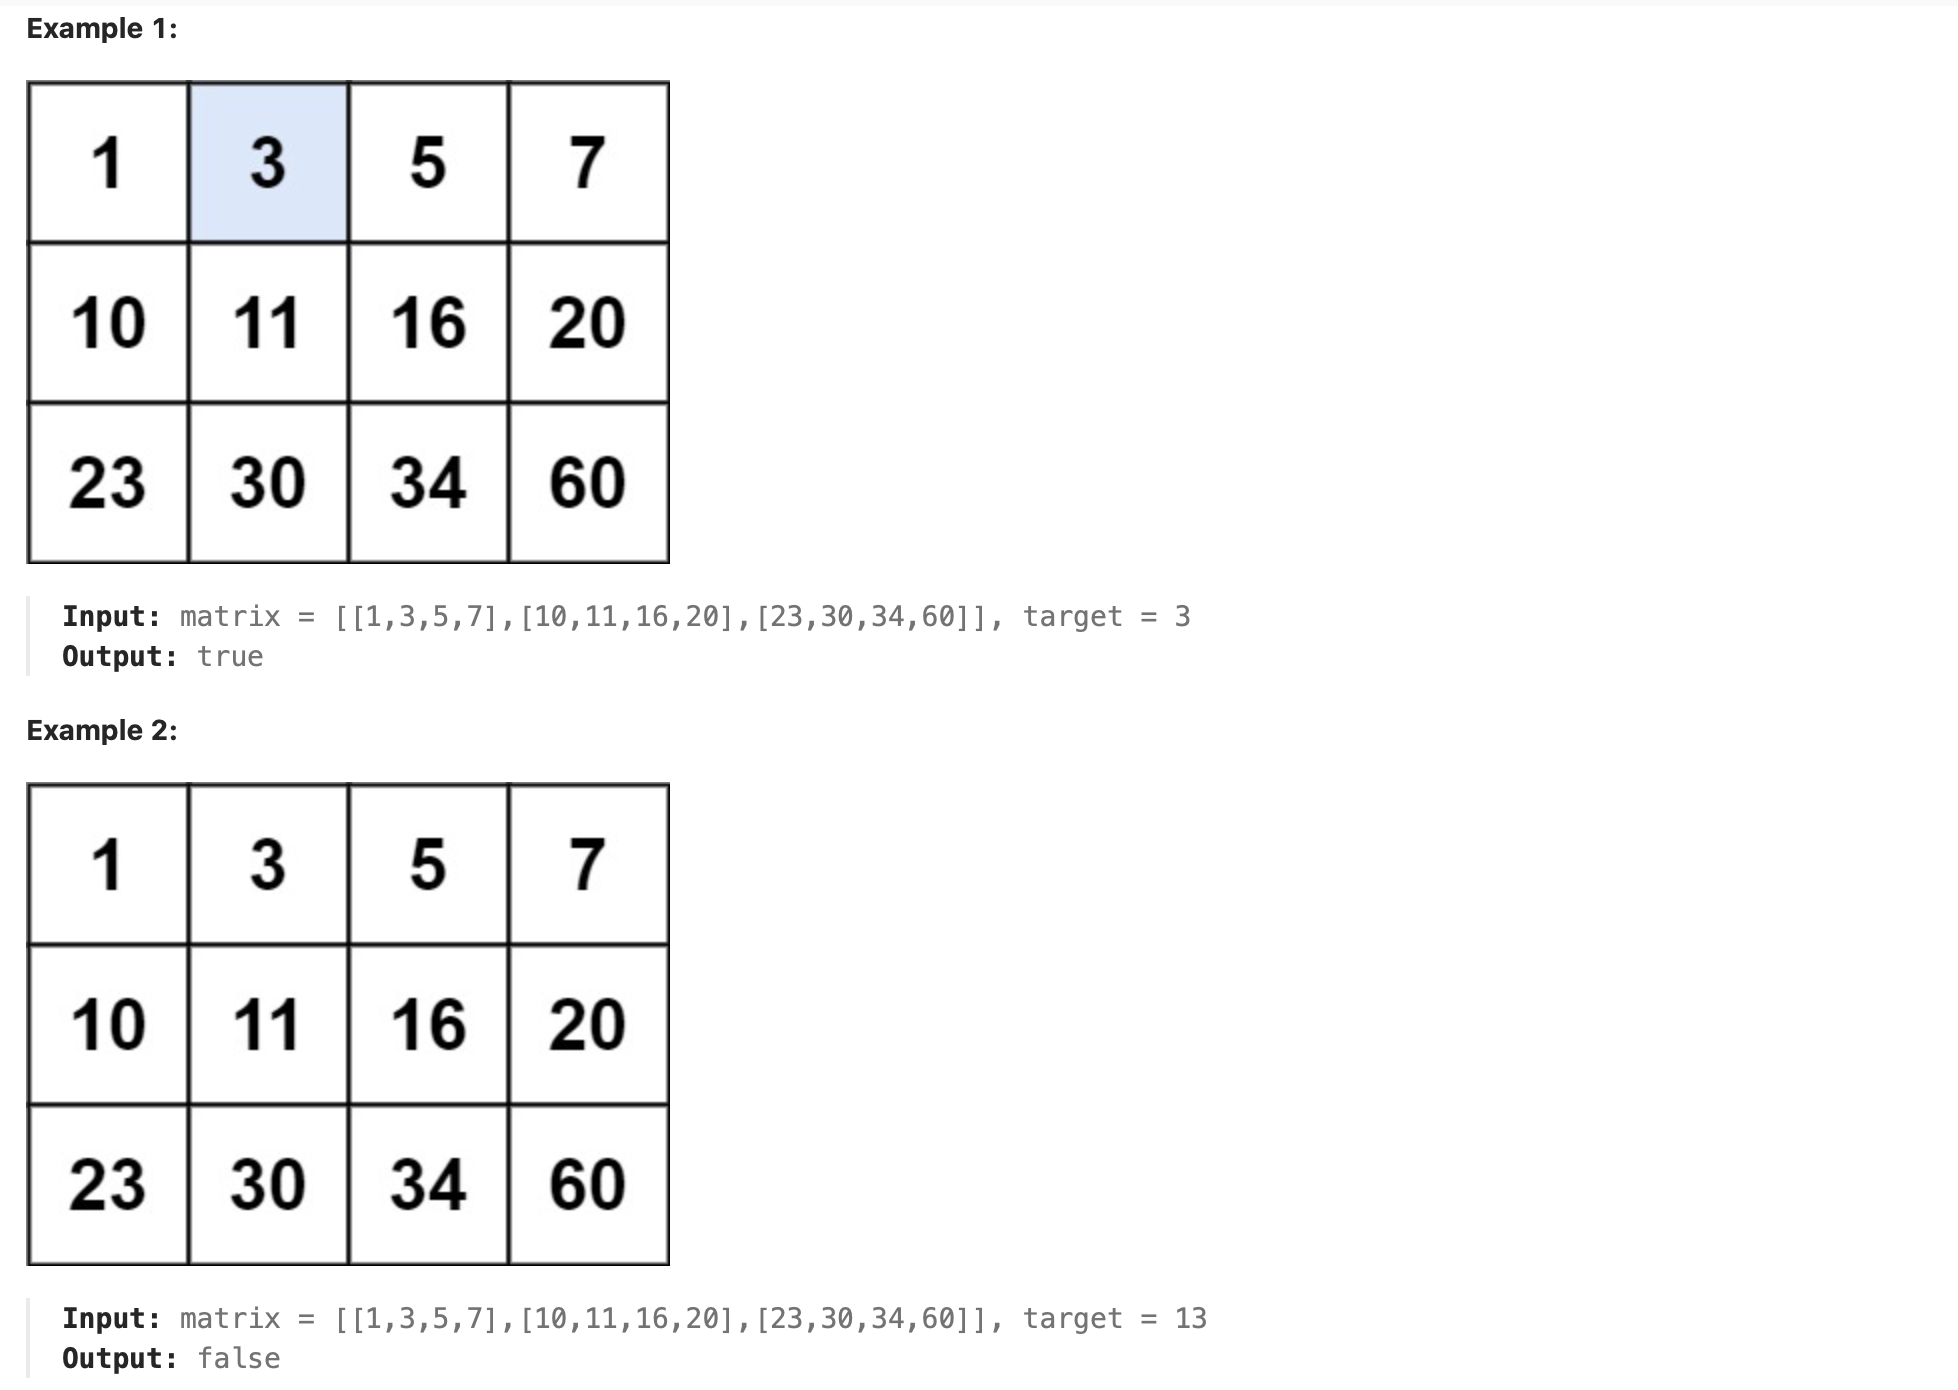

## Approach Overview:

We perform a binary search operation twice (on the rows and then columns) to spot the exact location of the target value in the matrix. 

1) We first perform binary search on the matrix rows to spot the row location of the target value (in which row is the target value in?)

2) We then perform binary search on the matrix column positions / indexes (for that specified row) to spot the exact location of target value in row (in which position in the row is the target value located?)


## Detailed Explanation:

This is an interesting problem. Despite the fact that there are many ways to solve this question, the problem gives away the fact they want us to only use binary search to solve it. 

How do we know? 

Well for one, they specified they want a solution of `O(logk) where k = m * n` time complexity. And we all know binary search TC is `O(logx) where x = number of iterable items where searching over`. 

Second, the entries in the matrix is sorted in ascending order, this is a key feature for binary search: the data input is always sorted in ascending order.


## Key Challenges:

<b> 1) I couldn't implement binary search on the row entries -- couldn't spot the pattern :( </b>

To implement binary search on the row entries we needed to leverage the fact that the values are sorted in ascending order. 

We needed to realize that if the smallest value in the current row is larger than target, then target cannot be located in that row or other rows below it, so it must be in a row above the current row. Second, if target is larger than the last value (largest) in that specified row, then target must be located in a row below the current row.

After we check against each case (target > last row entry OR target < first row entry), we then just need to shift either the top or bottom row pointers accordingly, to further narrow our search window. 

<b> 2) Working around the EDGE CASE that the target is smaller than the smallest value in matrix or target is larger than the largest value in matrix (i.e. target is not in matrix)</b>

One edge case of this problem. What if target is too small or too large than the smallest or largest value in the matrix (target is not in any rows of matrix)? What happens then? How we check against that?

Solution: Remember the condition of the while loop?  The while loop continues to run as long as the top row pointer does not exceed the bottom row pointer, once it does exceed, this means that we have gone out of bounds of the matrix (rows). What this means in simple terms is that the target value is either too large than the largest value in the matrix (last matrix element) or target value smaller than the smallest value in the matrix (first matrix element). Which means target value is not in matrix. If we want to be as efficient as possible, we want to spot and deal with this edge case as soon as possible (after we've searched for target in all the plausible matrix's rows).

So after we finish searching for target in all the plausible matrix's rows (after first binary search operation) we  check if the row pointers has gone out of bounds, then `return False` right away. 

<b> IMPORTANT NOTE: THIS IS NOT A COMPULSORY CHECK TO PERFORM, if we do not check against this edge case, the code will still run fine and pass all possible test cases. Because it will just run the second binary search operation on the column positions for the current row, realize the target is not in there and then it will exit the search loop and then the algo will just `return False`.</b>
    
<b> The only thing this edge case accomplishes is that it makes the overall search solution faster (i.e. more time efficient). It's an optimisation step. Instead of searching twice (first on the rows entries and second on the column entries), we now only have to search once (on the row entries ONLY), but also please remember this will only get executed for the special case that the target value does not fall inside the matrix's value range.</b>


# Solution

In [ ]:
class Solution:
    def searchMatrix(self, matrix: List[List[int]], target: int) -> bool:
        
       

        # TOP row in matrix 
        topRow = 0

        # BOTTOM row in matrix
        bottomRow = len(matrix) - 1
        
        # we're now going to run binary search on the row entries of the matrix #

        # continue as long as we are within the row bounds of the matrix
        while topRow <= bottomRow:
            
            # calculate the position of the middle row 
            currentrow = (topRow + bottomRow) // 2

            # check if target is smaller than smallest value in current row
            if target < matrix[currentrow][0]:
                
            # if yes then move the bottomRow pointer above the currentrow position
                bottomRow = currentrow - 1
            # check if target is larger than largest value in current row
            elif target > matrix[currentrow][-1]: 

            # if yes then move the topRow below the currentrow position
                topRow = currentrow + 1
            
            # else this means that we discovered the row that target is in
            else:
    
    # hence save the currentrow position (target's row location) and stop the loop 
                break
        
        # check if target is not in matrix's range of values
        if (topRow > bottomRow):

        # if target is not in matrix's range of values, return False 
           return False
        

        # initialize left pointer to point to first column position in matrix       
        left = 0

        # initialize right pointer to point to last column position in matrix       
        right = len(matrix[0]) - 1
        
       # we're now going to run binary search on the column entries of the matrix #
       
       # continue as long as we're within the column bounds of the matrix
        while left <= right:

            # calculate the position of the middle column
            mid = (left + right) // 2
            
            # check if target is smaller than the middle value in currentrow 
            if target < matrix[currentrow][mid]:

        # if yes, then move right pointer to the left of the current middle pointer's position    
                right = mid - 1
            
            # check if target is larger than the middle value in currentrow 
            if target > matrix[currentrow][mid]:  
            
            # if yes, then move the left pointer to the right of the current middle pointer's position     
                left = mid + 1
            
            # check if target is in current matrix position
            if target == matrix[currentrow][mid]:   

                # return True (we've found target)
                return True
        
        # return False, we did not find target :( 
        return False           